In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\Placement_Data_Full_Class (1).csv")
df.head()

,Sno,Gender,10th %,SSC Board,12th %,HSC Board,12th Stream,Degree %,Degree stream,Work exp,specialisation,Mba %,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,Mkt&Fin,55.50,Placed,425000.0


In [7]:
df=df[["Mba %","salary"]]

In [ ]:
df.head()

,Mba %,salary
0,58.80,270000.0
1,66.28,200000.0
2,57.80,250000.0
3,59.43,NaN
4,55.50,425000.0


In [11]:
df=df.dropna(subset='salary')
df.head()

,Mba %,salary
0,58.80,270000.0
1,66.28,200000.0
2,57.80,250000.0
4,55.50,425000.0
7,62.14,252000.0


In [15]:
X=df[["Mba %"]]
y=df["salary"]

In [17]:
X

,Mba %
0,58.80
1,66.28
2,57.80
4,55.50
7,62.14
...,...
209,56.49
210,74.49
211,53.62
212,69.72


In [19]:
y

0      270000.0
1      200000.0
2      250000.0
4      425000.0
7      252000.0
         ...   
209    216000.0
210    400000.0
211    275000.0
212    295000.0
213    204000.0
Name: salary, Length: 148, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [25]:
X_train.shape

(118, 1)

In [65]:
class Lin_Regression:

    def __init__(self):
        self.m = 0
        self.b = 0

    def fit(self, X_train, y_train):
        # Convert to numpy arrays to remove labels
        X_train = X_train.values
        y_train = y_train.values

        num = ((X_train - X_train.mean()) * (y_train - y_train.mean())).sum()
        den = ((X_train - X_train.mean())**2).sum()

        self.m = (num / den).item()    # Extract as float (no column name)
        self.b = (y_train.mean() - self.m * X_train.mean()).item()

    def predict(self, X_test):
        return self.m * X_test + self.b

# After fitting the model, print the values
lr = Lin_Regression()
lr.fit(X_train, y_train)

# Now print slope (m) and intercept (b)
print("Slope (m):", lr.m)
print("Intercept (b):", lr.b)

Slope (m): 3.1988557898962348e-12
Intercept (b): 285406.7796610168


In [67]:
X_test.iloc[0]

Mba %    72.29
Name: 160, dtype: float64

In [69]:
print(lr.predict(X_test.iloc[0]))

Mba %    285406.779661
Name: 160, dtype: float64


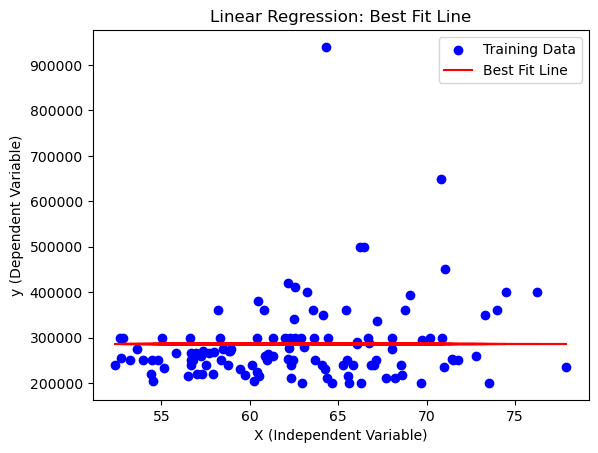

In [71]:
# Plot the training data points
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Create the regression line using the model parameters (m and b)
y_pred = lr.predict(X_train)  # Predict y values for each X_train

# Plot the regression line
plt.plot(X_train, y_pred, color='red', label='Best Fit Line')

# Add labels and title
plt.xlabel('X (Independent Variable)')
plt.ylabel('y (Dependent Variable)')
plt.title('Linear Regression: Best Fit Line')
plt.legend() #Shows the legend so you can differentiate between the training data and the regression line

# Show the plot
plt.show()